<a href="https://colab.research.google.com/github/endomorphisms/backtester/blob/main/backtester_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
def gen_price(pair, _period="2y",_interval='1d'):
  return yf.Ticker(pair).history(period=_period,interval=_interval)[["Close"]]

In [ ]:
def gen_il(ts):
  pr = ts.div(ts[0])
  il = pr**0.5-0.5*(pr+1)
  return il

In [ ]:
def backtest(token_a, token_b, period, interval, capital=100000):
  benchmark = 0
  p_a = gen_price(token_a+'-USD',_period=period,_interval=interval)
  p_b = gen_price(token_b+'-USD',_period=period,_interval=interval)
  p = p_a['Close']/p_b['Close']
  il = gen_il(p)
  fig, ax1 = plt.subplots(figsize=(14,5))
  ax2 = ax1.twinx()
  ax1.plot(p.index, p, 'g-')
  ax2.plot(p.index, il, 'b-')

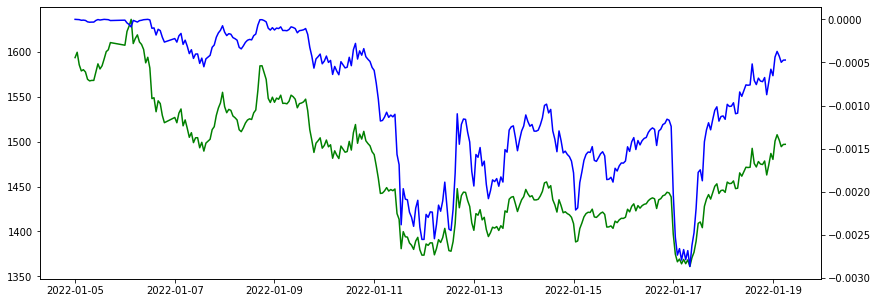

In [ ]:
backtest('ETH','MATIC','15d','1h')